In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Dimensioni dell'immagine
altezza = 9  # 3 blocchi da 3 pixel in altezza
larghezza = 12 # 4 blocchi da 3 pixel in larghezza
canali = 3   # RGB

# Inizializza un tensore di zeri (immagine completamente nera)
cubo_2d_tensor = torch.zeros(canali, altezza, larghezza, dtype=torch.float32)

# Definiamo colori unici per ogni faccia (valori RGB normalizzati tra 0 e 1)
colors = {
    'U': [1.0, 0.5, 0.0],  # Arancione per Up
    'L': [0.0, 0.8, 0.0],  # Verde per Left
    'F': [0.0, 0.0, 1.0],  # Blu per Front
    'R': [1.0, 0.0, 0.0],  # Rosso per Right
    'B': [0.5, 0.0, 0.5],  # Viola per Back
    'D': [0.8, 0.8, 0.0]   # Giallo per Down
}

# Dimensioni di ogni blocco "lettera"
blocco_h = 3
blocco_w = 3

# Posizioniamo le "facce" sull'immagine
# 'U' (Up) - Posizionato al centro della prima riga di blocchi
# Centro orizzontale: (larghezza_totale - larghezza_blocco) / 2 = (12 - 3) / 2 = 4.5
# Usiamo indici interi, quindi da 4 a 7 (3 pixel di larghezza)
cubo_2d_tensor[:, 0:blocco_h, 4:4+blocco_w] = torch.tensor(colors['U']).view(3, 1, 1)


# 'L' (Left) - Prima colonna della riga centrale
cubo_2d_tensor[:, blocco_h:blocco_h*2, 0:blocco_w] = torch.tensor(colors['L']).view(3, 1, 1)

# 'F' (Front) - Seconda colonna della riga centrale
cubo_2d_tensor[:, blocco_h:blocco_h*2, blocco_w:blocco_w*2] = torch.tensor(colors['F']).view(3, 1, 1)

# 'R' (Right) - Terza colonna della riga centrale
cubo_2d_tensor[:, blocco_h:blocco_h*2, blocco_w*2:blocco_w*3] = torch.tensor(colors['R']).view(3, 1, 1)

# 'B' (Back) - Quarta colonna della riga centrale
cubo_2d_tensor[:, blocco_h:blocco_h*2, blocco_w*3:blocco_w*4] = torch.tensor(colors['B']).view(3, 1, 1)


# 'D' (Down) - Posizionato al centro dell'ultima riga di blocchi
cubo_2d_tensor[:, blocco_h*2:blocco_h*3, 4:4+blocco_w] = torch.tensor(colors['D']).view(3, 1, 1)


print(f"Dimensioni del tensore PyTorch del cubo 2D: {cubo_2d_tensor.shape}")

Dimensioni del tensore PyTorch del cubo 2D: torch.Size([3, 9, 12])


Dimensioni dell'array NumPy per Matplotlib: (9, 12, 3)


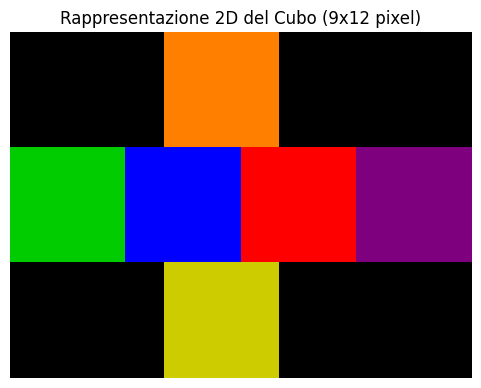

Immagine del cubo 2D salvata come 'cubo_2d_rappresentazione.png'


<Figure size 640x480 with 0 Axes>

In [11]:
# Converti il tensore PyTorch in un array NumPy
# Permuta le dimensioni da (C, H, W) a (H, W, C) per Matplotlib
image_numpy = cubo_2d_tensor.permute(1, 2, 0).numpy()

print(f"Dimensioni dell'array NumPy per Matplotlib: {image_numpy.shape}")

# Visualizza l'immagine
plt.figure(figsize=(larghezza / 2, altezza / 2)) # Regola la dimensione della figura
plt.imshow(image_numpy)
plt.title("Rappresentazione 2D del Cubo (9x12 pixel)")
plt.axis('off') # Nasconde gli assi

# Opzionale: Aggiungi una griglia per vedere i pixel
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, larghezza, 1), minor=True)
ax.set_yticks(np.arange(-0.5, altezza, 1), minor=True)
ax.grid(which='minor', color='white', linestyle='-', linewidth=0.5)

plt.show()

# Puoi anche salvare l'immagine
plt.savefig("cubo_2d_rappresentazione.png", bbox_inches='tight', pad_inches=0)
print("Immagine del cubo 2D salvata come 'cubo_2d_rappresentazione.png'")